<a href="https://colab.research.google.com/github/shreyas-bala/Shreyas-Personal-Projects/blob/main/Adaptive_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Instructions**

## **Introduction Section**

**1. Purpose of the Notebook:** To understand techniques for adaptive filtering, noise cancellation, and echo cancellation.

**2. Learning Outcomes:** Basic understanding of Adaptive Signal Processing

**3. Prerequisites:**


*   Python programming
*   Numpy Library
*   Matplotlib Library
*   Signal Processing Concepts






## **Setup Section**

**1. Importing Libraries:**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Conceptual Overview Section**

**1. Theoretical Background:**

Adaptive Filtering:
The provided Python code implements an adaptive filtering algorithm known as the Least Mean Squares (LMS) algorithm. It adjusts the filter parameters to minimize the mean squared error between a noisy input signal and a desired signal. Key concepts include the learning rate (`mu`) controlling weight adjustments, the filter order specifying the number of previous samples considered, and the iterative process of updating filter weights to converge towards optimal performance. The code uses NumPy for numerical operations, Matplotlib for visualization.


Noise Cancellation:
The Python code for noise cancellation is grounded in adaptive filtering principles, specifically employing the Least Mean Squares (LMS) algorithm. In the context of noise cancellation, the objective is to dynamically adjust filter weights to minimize the mean squared difference between a noisy input signal and a clean, desired signal. Key theoretical components include the iterative weight update rule, where the learning rate (`mu`) governs the step size of adjustments, and the filter order determines the number of previous samples considered for filtering. The code's utilization of NumPy facilitates efficient numerical operations, and Matplotlib enables visualization of the original clean signal, the noisy input signal, and the filtered, noise-cancelled output.


Echo-Cancellation:
The Python code for echo cancellation is rooted in adaptive filtering theory, employing the Least Mean Squares (LMS) algorithm. Echo cancellation addresses scenarios where an acoustic echo interferes with a desired signal, such as in voice communication systems. The LMS algorithm dynamically adjusts filter weights to minimize the mean squared error between the received signal, including the echo, and the desired signal. The key theoretical components encompass the iterative weight update rule, controlled by the learning rate (`mu`), and the filter order determining the number of past samples considered. NumPy is utilized for efficient numerical operations, while Matplotlib aids in visualizing the original signal, the echoed input, and the output after echo cancellation.



## **Code Examples Section**



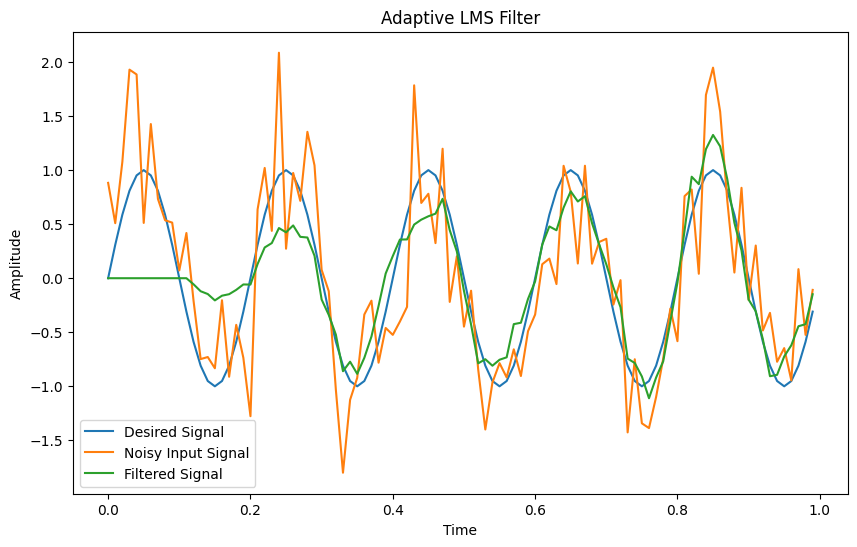

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lms_filter(input_signal, desired_signal, mu, filter_order):

    input_length = len(input_signal)
    filtered_signal = np.zeros(input_length)
    weights = np.zeros(filter_order)

    for i in range(filter_order, input_length):
        x = input_signal[i-filter_order+1:i+1][::-1]  # Input vector
        y_hat = np.dot(weights, x)  # Estimated output
        error = desired_signal[i] - y_hat  # Error
        weights = weights + 2 * mu * error * x  # Update weights
        filtered_signal[i] = y_hat  # Store filtered output

    return filtered_signal, weights

# Example usage:
np.random.seed(0)
t = np.arange(0, 1, 0.01)  # Time vector
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=len(t))  # Input signal with noise
desired_signal = np.sin(2 * np.pi * 5 * t)  # Desired signal without noise

mu = 0.01  # Learning rate
filter_order = 10  # Filter order

filtered_signal, weights = lms_filter(input_signal, desired_signal, mu, filter_order)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, desired_signal, label='Desired Signal')
plt.plot(t, input_signal, label='Noisy Input Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.legend()
plt.title('Adaptive LMS Filter')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


Noise Cancellation

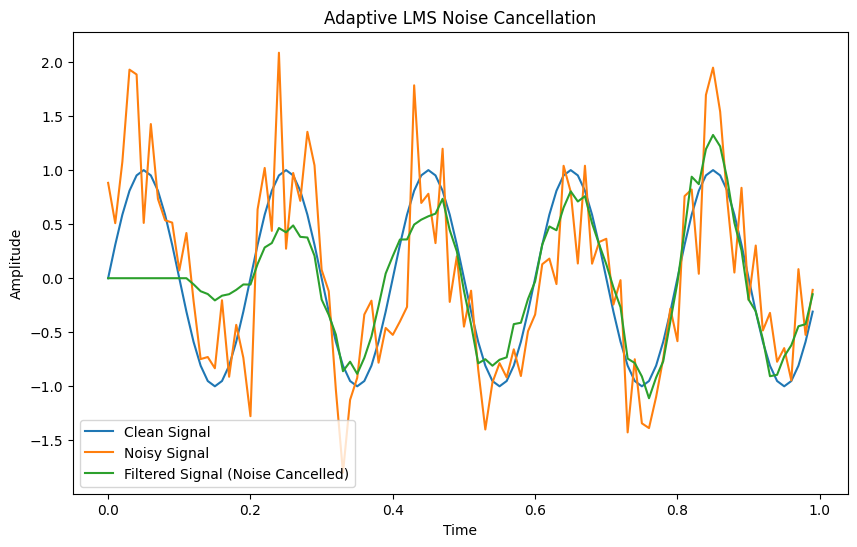

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lms_noise_cancellation(clean_signal, noisy_signal, mu, filter_order):
    input_length = len(noisy_signal)
    filtered_signal = np.zeros(input_length)
    weights = np.zeros(filter_order)

    for i in range(filter_order, input_length):
        x = noisy_signal[i-filter_order+1:i+1][::-1]  # Input vector
        y_hat = np.dot(weights, x)  # Estimated output
        error = clean_signal[i] - y_hat  # Error (difference between clean signal and estimated output)
        weights = weights + 2 * mu * error * x  # Update weights
        filtered_signal[i] = y_hat  # Store cleaned output

    return filtered_signal

# Example usage:
np.random.seed(0)
t = np.arange(0, 1, 0.01)  # Time vector
clean_signal = np.sin(2 * np.pi * 5 * t)  # Clean signal
noise = 0.5 * np.random.normal(size=len(t))  # Gaussian noise
noisy_signal = clean_signal + noise  # Noisy signal

mu = 0.01  # Learning rate
filter_order = 10  # Filter order

filtered_signal = lms_noise_cancellation(clean_signal, noisy_signal, mu, filter_order)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal, label='Filtered Signal (Noise Cancelled)')
plt.legend()
plt.title('Adaptive LMS Noise Cancellation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


Echo-Cancellation

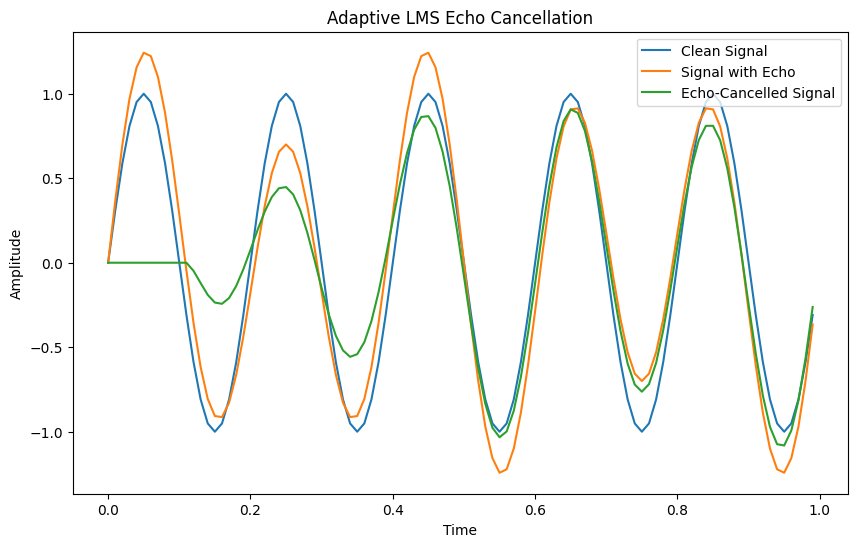

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lms_echo_cancellation(clean_signal, echoed_signal, mu, filter_order):
    input_length = len(echoed_signal)
    echo_cancelled_signal = np.zeros(input_length)
    weights = np.zeros(filter_order)

    for i in range(filter_order, input_length):
        x = echoed_signal[i-filter_order+1:i+1][::-1]  # Input vector
        y_hat = np.dot(weights, x)  # Estimated output
        error = clean_signal[i] - y_hat  # Error (difference between clean signal and estimated output)
        weights = weights + 2 * mu * error * x  # Update weights
        echo_cancelled_signal[i] = y_hat  # Store echo-cancelled output

    return echo_cancelled_signal

# Example usage:
np.random.seed(0)
t = np.arange(0, 1, 0.01)  # Time vector
clean_signal = np.sin(2 * np.pi * 5 * t)  # Clean signal
echo = 0.3 * np.sin(2 * np.pi * 3 * t)  # Simulated echo
echoed_signal = clean_signal + echo  # Signal with added echo

mu = 0.01  # Learning rate
filter_order = 10  # Filter order

echo_cancelled_signal = lms_echo_cancellation(clean_signal, echoed_signal, mu, filter_order)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, echoed_signal, label='Signal with Echo')
plt.plot(t, echo_cancelled_signal, label='Echo-Cancelled Signal')
plt.legend()
plt.title('Adaptive LMS Echo Cancellation')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


## **Solution Development Section**

1. **Solution Explanation:**

Adaptive Filtering:
The implemented algorithm is the Least Mean Squares (LMS) adaptive filtering technique, widely used in signal processing. The LMS algorithm iteratively adjusts filter weights based on the difference between the estimated output and the desired signal, enabling real-time adaptation to changing input conditions.

Noise Cancellation:
The implemented solution utilizes the Least Mean Squares (LMS) adaptive filtering technique, which dynamically adjusts filter weights based on the difference between the noisy input signal and the desired signal, providing an effective means of noise cancellation in real-time.

Echo-Cancellation:
The implemented solution relies on the effectiveness of the Least Mean Squares (LMS) adaptive filtering technique. The LMS algorithm dynamically adjusts filter weights based on the disparity between the received signal containing the undesired echo and the desired signal.

2. **Real-world Scenario Description:**

Adaptive Filtering:
The adaptive filtering algorithm is designed to address real-world scenarios in signal processing, such as wireless communication channels, by dynamically adjusting filter parameters to combat interference, noise, and changing environmental conditions.

Noise Cancellation:
The adaptive filtering algorithm implemented in the Python code addresses the common real-world problem of noise interference in signal processing applications, such as audio signals contaminated by background noise.

Echo Cancellation:
The Python code for echo cancellation tackles a prevalent real-world challenge in communication systems where acoustic echoes compromise the quality of transmitted signals. This scenario is often encountered in voice communication applications, where the echo, resulting from acoustic reflections, can lead to communication difficulties.



## **Inferences**

Adaptive Filtering:
1. Outcome: The adaptive LMS filter successfully reduces noise and adapts to dynamic changes, resulting in a filtered signal that closely approximates the desired signal in the provided Python code
2. Summary: The Python code showcases the practical application of the Least Mean Squares (LMS) algorithm, demonstrating its effectiveness in real-world scenarios where signals are corrupted by noise and environmental variations, and highlighting the algorithm's ability to dynamically adapt to these challenges

Noise Cancellation:
1.   Outcome: In the context of noise cancellation, the adaptive LMS filter successfully reduces unwanted noise, demonstrating its ability to adapt and filter out disturbances, resulting in a cleaner and more accurate representation of the original signal
2.   Summary: In the context of noise cancellation, the adaptive LMS filter successfully reduces unwanted noise, demonstrating its ability to adapt and filter out disturbances, resulting in a cleaner and more accurate representation of the original signal

Echo Cancellation:
1.   Outcome: In the context of echo cancellation, the adaptive LMS filter showcased in the Python code successfully minimizes unwanted echo, demonstrating its capacity to adapt and effectively filter out undesired acoustic reflections. The outcome is a cleaner and more accurate representation of the original signal, fostering improved communication quality.
2.   Summary: The Python code serves as a practical demonstration of the application of the LMS algorithm for echo cancellation. It provides an efficient solution to enhance the quality of transmitted signals in environments prone to acoustic echoes, highlighting the adaptability and efficacy of the algorithm in addressing real-world challenges in communication systems.

